In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: load your data
df = pd.read_csv("AI_Resume_Screening.csv")
df_demo = pd.read_csv("AI_Resume_Screening_with_demographics.csv")

# Make plots more PPT-friendly
plt.rcParams.update({
    "figure.figsize": (7, 4.5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

def save_and_show(filename: str):
    """Save high-res PNG for PPT and show inline."""
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("AI_Resume_Screening.csv")

df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

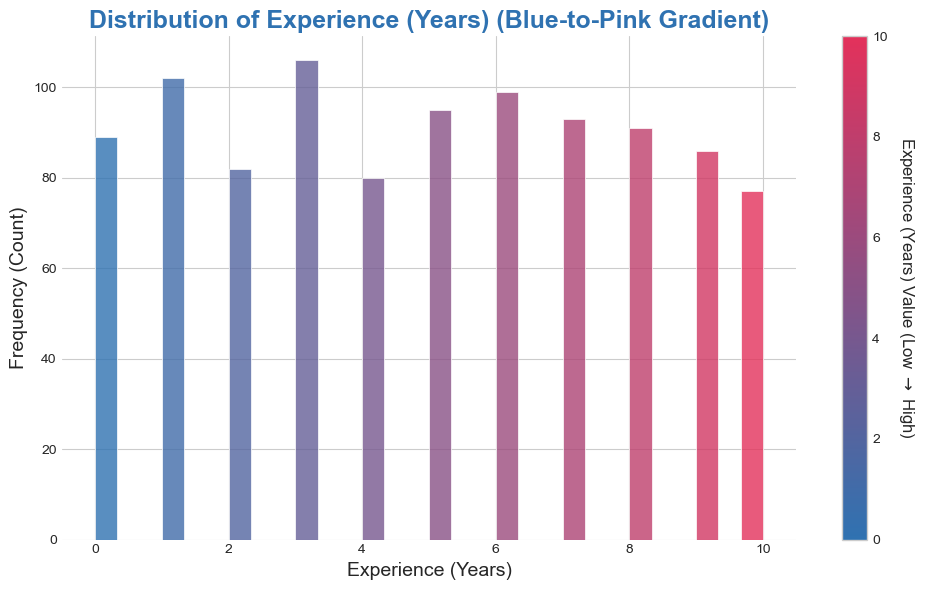

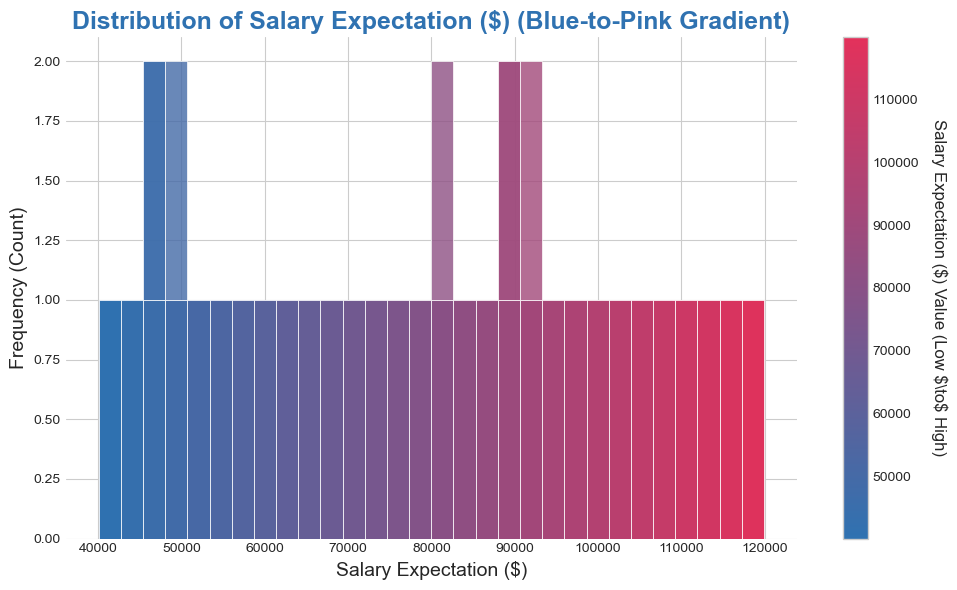

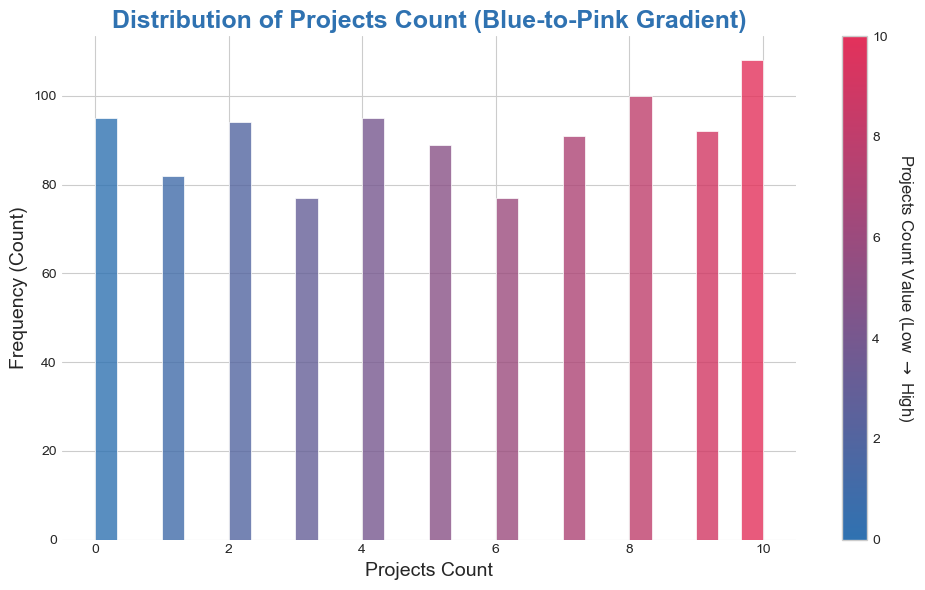

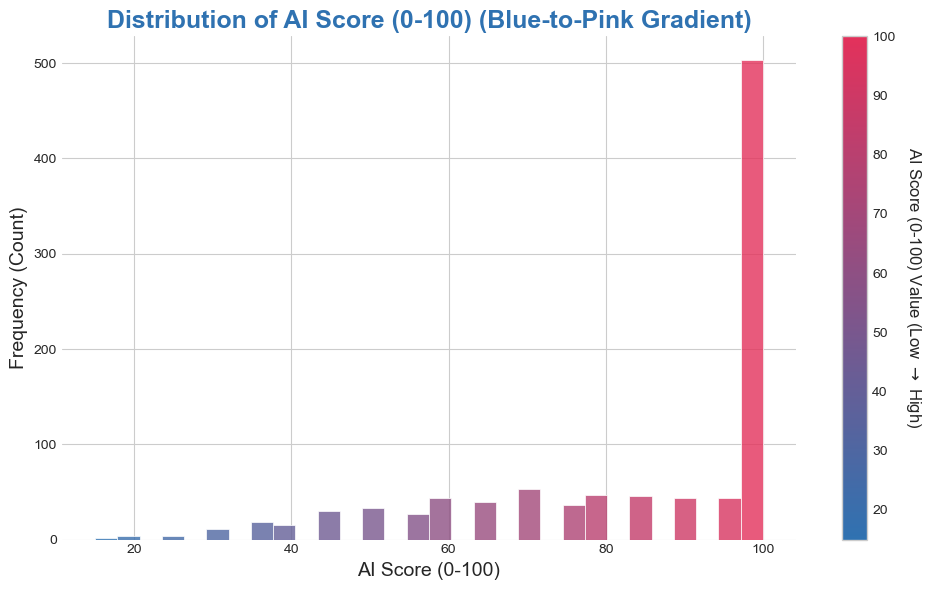

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Define the start and end colors for the gradient
BLUE_START = '#2f72b1'
PINK_END = '#e3315b'

# Create a custom color map (LinearSegmentedColormap)
# This map will define the transition from BLUE_START to PINK_END
custom_cmap = LinearSegmentedColormap.from_list(
    "BlueToPinkGradient", 
    [BLUE_START, PINK_END]
)

# Set a clean style
plt.style.use('seaborn-v0_8-whitegrid') 

num_cols = ["Experience (Years)", "Salary Expectation ($)", "Projects Count", "AI Score (0-100)"]

# --- IMPORTANT: Ensure 'df' is loaded with your data ---
# Placeholder: Assuming 'df' is already loaded and contains 'num_cols'.

for col in num_cols:
    # 1. Create a Normalized Hue Column (0 to 1)
    # This scales the column values to match the 0-to-1 range of the colormap.
    df['_hue_gradient_'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

    plt.figure(figsize=(10, 6))

    # 2. Use the Custom Color Map in histplot
    sns.histplot(
        data=df,
        x=col,
        hue='_hue_gradient_', 
        palette=custom_cmap,   # Use the custom-defined gradient!
        kde=True,
        bins=30,
        linewidth=0.5,
        edgecolor='white', # White edges make the bars pop slightly
        alpha=0.8,
        legend=False 
    )

    # 3. Enhanced Styling
    plt.title(
        f"Distribution of {col} (Blue-to-Pink Gradient)", 
        fontsize=18, 
        fontweight='bold', 
        color=BLUE_START # Use the blue for the title for consistency
    )

    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency (Count)", fontsize=14)
    
    # 4. Add a color bar to show the gradient mapping
    norm = plt.Normalize(df[col].min(), df[col].max())
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
    cbar.set_label(f'{col} Value (Low $\\to$ High)', rotation=270, labelpad=20, fontsize=12)

    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

# 5. Clean up the temporary column after the loop
del df['_hue_gradient_']

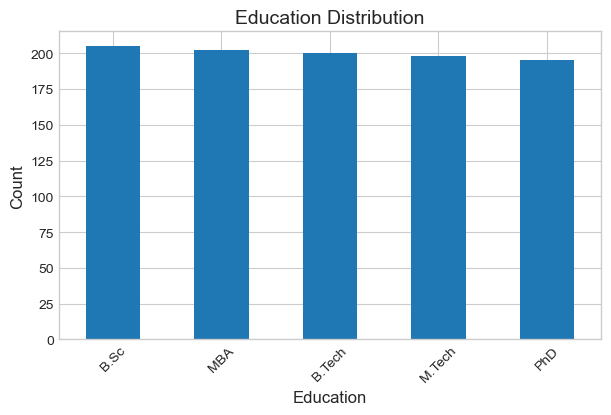

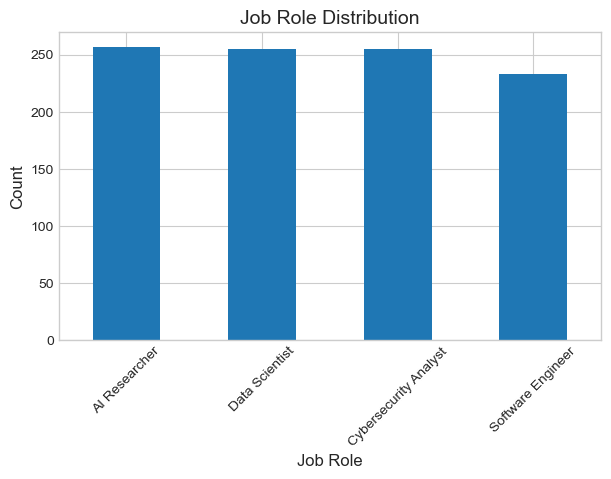

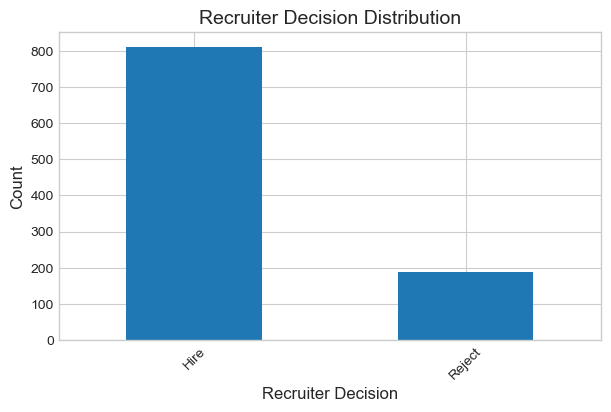

In [4]:
cat_cols = ["Education", "Job Role", "Recruiter Decision"]

for col in cat_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} Distribution")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


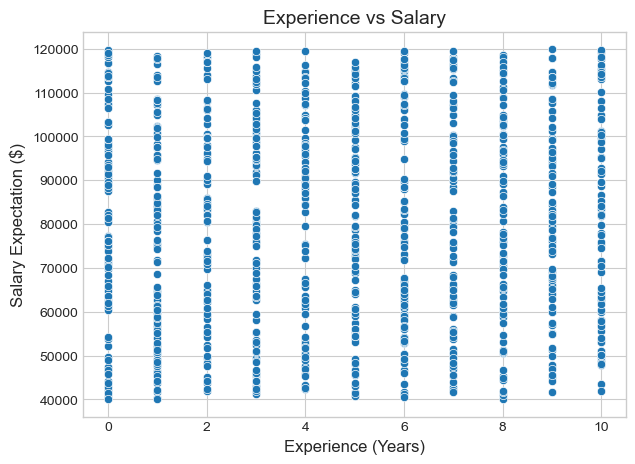

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Experience (Years)", y="Salary Expectation ($)")
plt.title("Experience vs Salary")
plt.show()


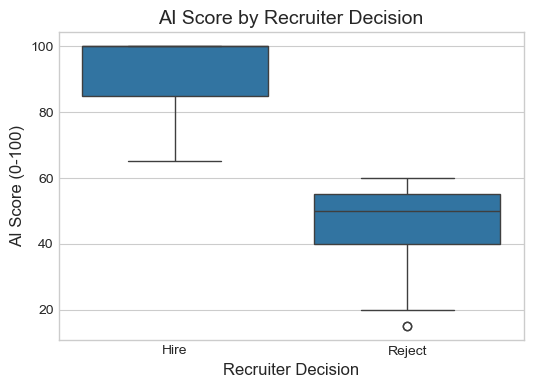

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Recruiter Decision", y="AI Score (0-100)")
plt.title("AI Score by Recruiter Decision")
plt.show()


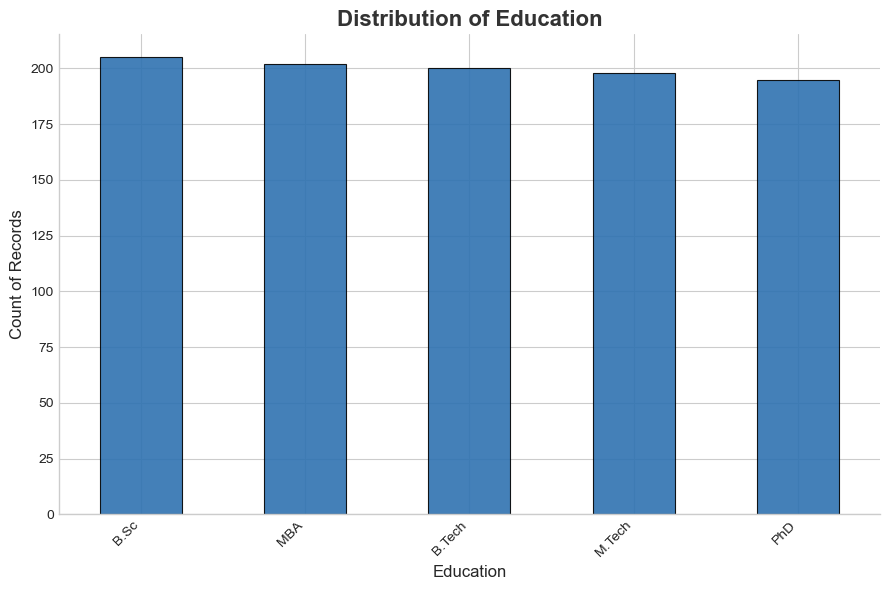

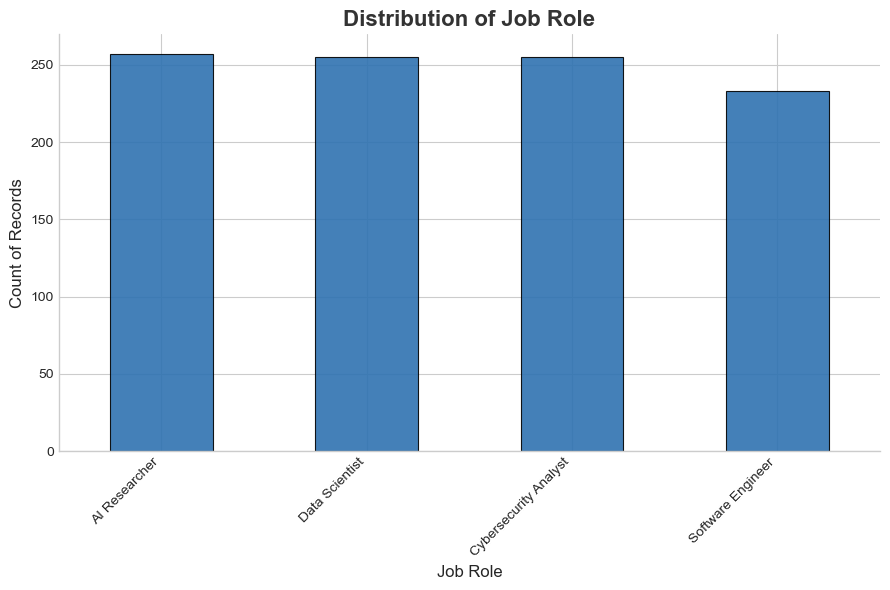

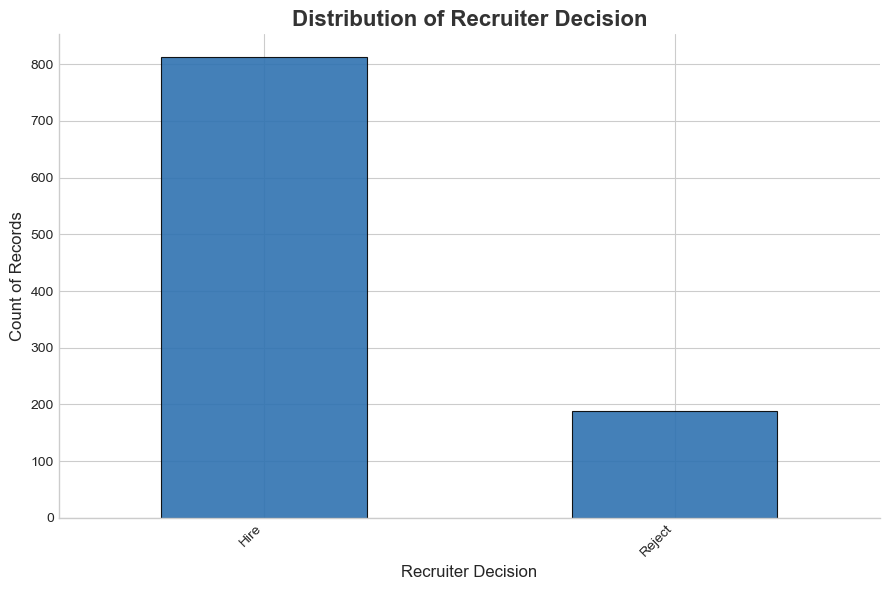

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the custom color
PRIMARY_COLOR = '#2f72b1' # Your requested deep blue

# Set a professional style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid') 

cat_cols = ["Education", "Job Role", "Recruiter Decision"]

# Assuming 'df' is your DataFrame, which must be loaded.

for col in cat_cols:
    plt.figure(figsize=(9, 6)) # Increased figure size for better readability

    # 1. Calculate the value counts
    counts = df[col].value_counts()
    
    # 2. Plot using the pandas .plot() method (as requested)
    ax = counts.plot(
        kind="bar",
        color=PRIMARY_COLOR, # Set the custom color
        edgecolor='black',   # Add a black border for definition
        linewidth=0.8,
        alpha=0.9
    )

    # 3. Enhanced Title and Labels
    plt.title(
        f"Distribution of {col}",
        fontsize=16,
        fontweight='bold',
        color='#333333' # Dark gray for a professional title
    )
    
    plt.ylabel("Count of Records", fontsize=12)
    plt.xlabel(col, fontsize=12)

    # 4. Customize the X-ticks
    # 'ha='right'' adjusts the alignment so the rotated text looks better
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    # 5. Remove top and right borders for a cleaner look
    sns.despine(top=True, right=True)

    plt.tight_layout() # Ensures everything fits
    plt.show()

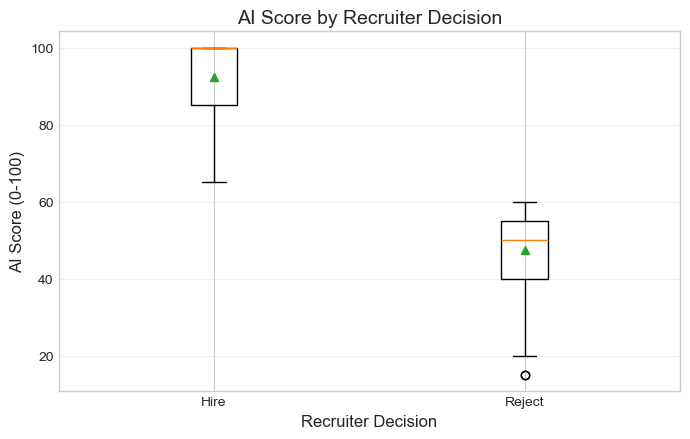

In [8]:
groups = [df[df["Recruiter Decision"] == g]["AI Score (0-100)"].dropna()
          for g in df["Recruiter Decision"].unique()]

labels = df["Recruiter Decision"].unique()

plt.figure()
plt.boxplot(groups, labels=labels, showmeans=True)
plt.title("AI Score by Recruiter Decision")
plt.xlabel("Recruiter Decision")
plt.ylabel("AI Score (0-100)")
plt.grid(axis="y", alpha=0.3)
save_and_show("ai_score_by_recruiter_decision.png")


### EDA for Demographics Dataset

In [10]:
df_demo = pd.read_csv("AI_Resume_Screening_with_demographics.csv")
df_demo.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Gender,Race,Age,Disability_Status
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100,Male,Asian,30,No
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100,Female,White,33,No
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70,Female,Hispanic,26,No
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95,Male,Asian,30,No
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100,Male,Hispanic,34,No


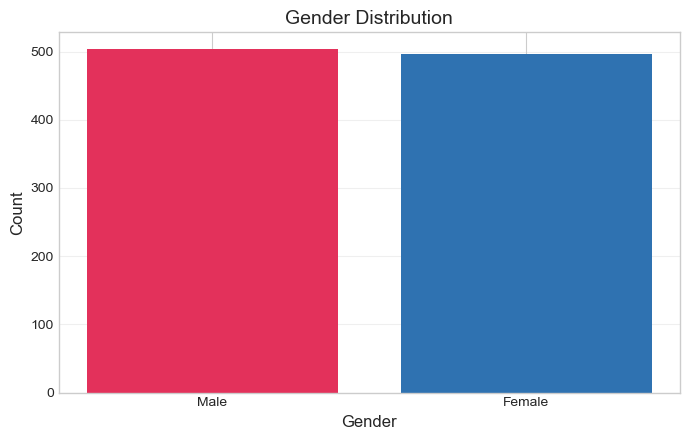

In [39]:
counts = df_demo["Gender"].value_counts()

custom_colors = ["#e3315b", "#2f72b1"]  # your two colors

plt.figure()
plt.bar(counts.index.astype(str), counts.values, color=custom_colors)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
save_and_show("gender_distribution.png")



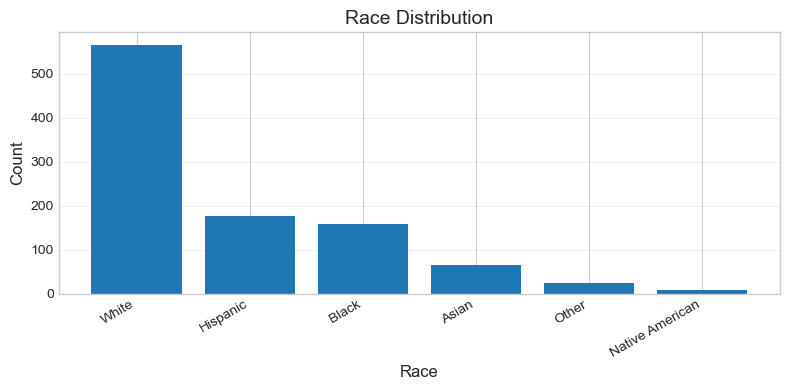

In [43]:
counts = df_demo["Race"].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", alpha=0.3)
save_and_show("race_distribution.png")


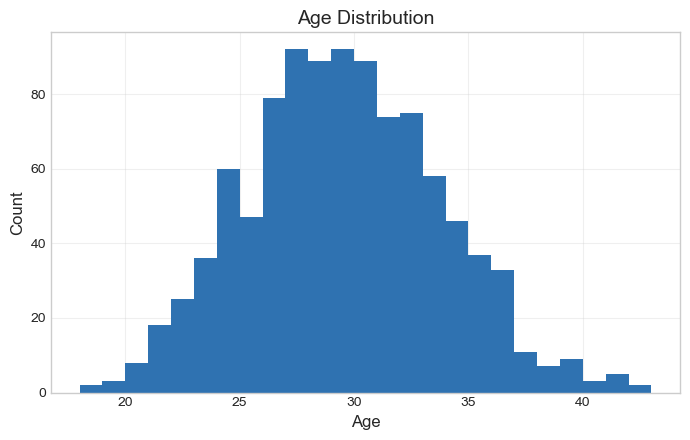

In [45]:
plt.figure()
plt.hist(df_demo["Age"].dropna(), bins=25, color="#2f72b1")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
save_and_show("age_distribution.png")


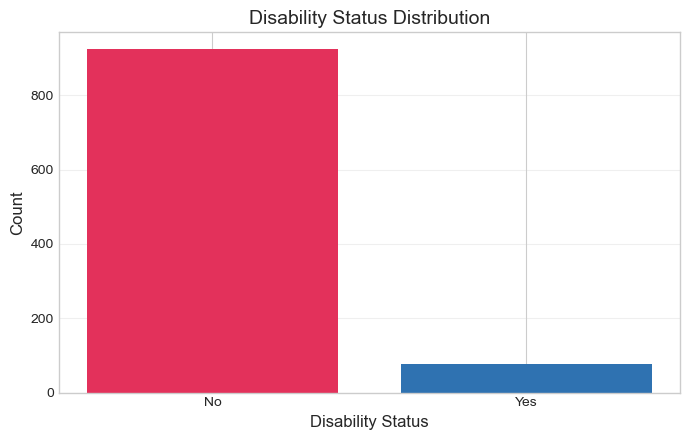

In [48]:
counts = df_demo["Disability_Status"].value_counts()

# Assign your two colors (will match order of categories)
custom_colors = ["#e3315b", "#2f72b1"]

plt.figure()
plt.bar(counts.index.astype(str), counts.values, color=custom_colors[:len(counts)])
plt.title("Disability Status Distribution")
plt.xlabel("Disability Status")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
save_and_show("disability_status_distribution.png")


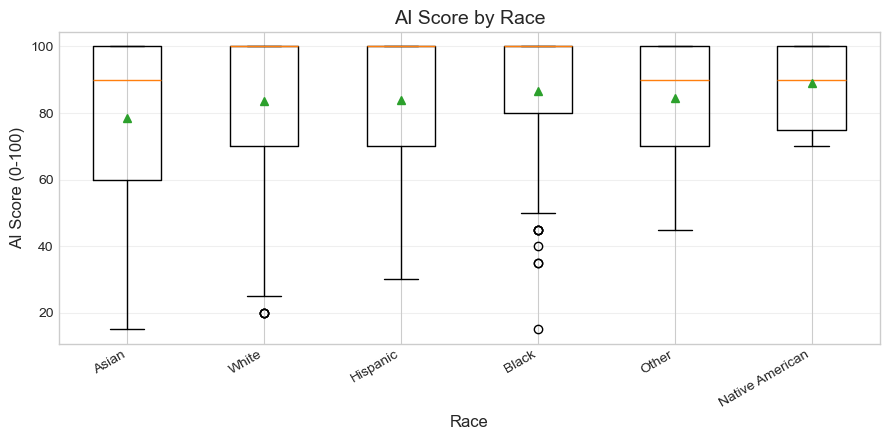

In [15]:
races = df_demo["Race"].unique()
groups = [df_demo[df_demo["Race"] == r]["AI Score (0-100)"].dropna()
          for r in races]

plt.figure(figsize=(9, 4.5))
plt.boxplot(groups, labels=races, showmeans=True)
plt.title("AI Score by Race")
plt.xlabel("Race")
plt.ylabel("AI Score (0-100)")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", alpha=0.3)
save_and_show("ai_score_by_race.png")


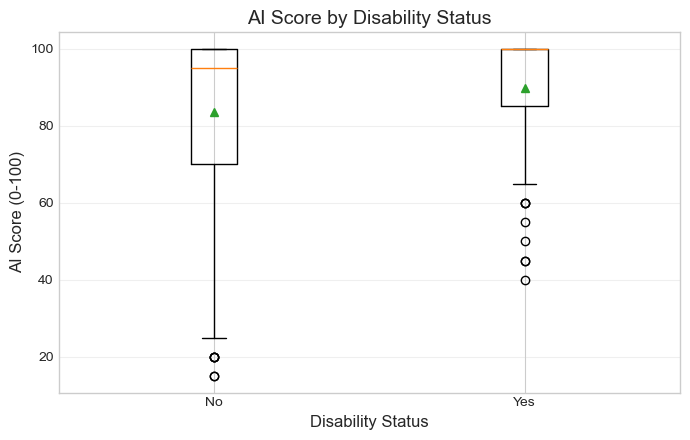

In [16]:
groups = [df_demo[df_demo["Disability_Status"] == d]["AI Score (0-100)"].dropna()
          for d in df_demo["Disability_Status"].unique()]
labels = df_demo["Disability_Status"].unique()

plt.figure()
plt.boxplot(groups, labels=labels, showmeans=True)
plt.title("AI Score by Disability Status")
plt.xlabel("Disability Status")
plt.ylabel("AI Score (0-100)")
plt.grid(axis="y", alpha=0.3)
save_and_show("ai_score_by_disability.png")


In [17]:
df_demo.groupby("Gender")["Recruiter Decision"].value_counts(normalize=True).unstack()


Recruiter Decision,Hire,Reject
Gender,,
Female,0.806841,0.193159
Male,0.817097,0.182903


In [18]:
df_demo.groupby("Race")["Recruiter Decision"].value_counts(normalize=True).unstack()


Recruiter Decision,Hire,Reject
Race,,
Asian,0.692308,0.307692
Black,0.841772,0.158228
Hispanic,0.802260,0.197740
Native American,1.000000,NaN
Other,0.800000,0.200000
White,0.818021,0.181979


In [19]:
df_demo.groupby("Disability_Status")["Recruiter Decision"].value_counts(normalize=True).unstack()

Recruiter Decision,Hire,Reject
Disability_Status,,
No,0.804984,0.195016
Yes,0.896104,0.103896


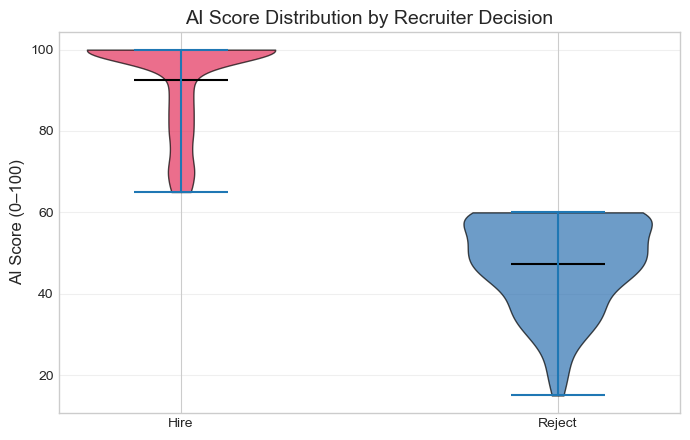

In [54]:
import numpy as np

plt.figure()

decisions = df["Recruiter Decision"].unique()
colors = ["#e3315b", "#2f72b1"]  # your colors

all_scores = []

for i, decision in enumerate(decisions):
    scores = df[df["Recruiter Decision"] == decision]["AI Score (0-100)"]
    all_scores.append(scores)

# Create violin plot
vp = plt.violinplot(all_scores, showmeans=True, showmedians=False)

# Recolor each violin body
for i, body in enumerate(vp['bodies']):
    body.set_facecolor(colors[i % len(colors)])
    body.set_edgecolor("black")
    body.set_alpha(0.7)

# Recolor mean line
vp['cmeans'].set_color("black")

plt.xticks(range(1, len(decisions)+1), decisions)
plt.title("AI Score Distribution by Recruiter Decision")
plt.ylabel("AI Score (0–100)")
plt.grid(axis="y", alpha=0.3)

save_and_show("ai_score_violin_plot.png")


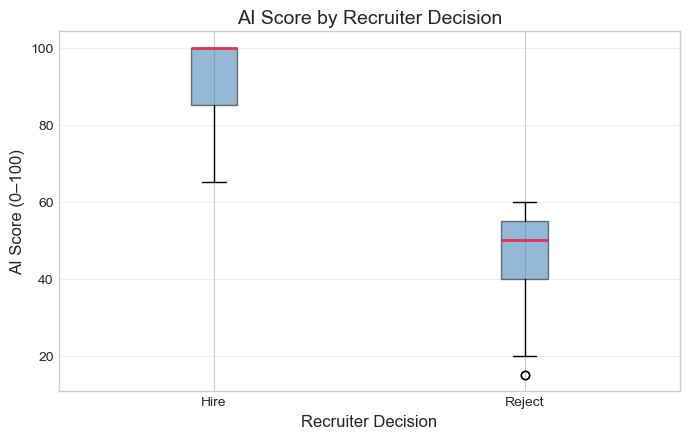

In [52]:
groups = [df[df["Recruiter Decision"] == g]["AI Score (0-100)"].dropna()
          for g in df["Recruiter Decision"].unique()]

labels = df["Recruiter Decision"].unique()

plt.figure()
plt.boxplot(groups, labels=labels, patch_artist=True,
            boxprops=dict(facecolor="#2f72b1", alpha=0.5),
            medianprops=dict(color="#e3315b", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"))
plt.title("AI Score by Recruiter Decision")
plt.xlabel("Recruiter Decision")
plt.ylabel("AI Score (0–100)")
plt.grid(axis="y", alpha=0.3)
save_and_show("ai_score_by_recruiter_decision.png")
